In [3]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as stats
import seaborn as sns

%pwd
os.chdir('C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data')
#os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data')
%pwd

C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data'

In [12]:
churn=pd.read_csv("Teleco_Cust_Attr.csv")

In [14]:
## Dropping few columns
churn.drop("customerID", axis = 1, inplace=True)

In [16]:
## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)

In [29]:
churn['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
5       Female
6         Male
7       Female
8       Female
9         Male
10        Male
11        Male
12        Male
13        Male
14        Male
15      Female
16      Female
17        Male
18      Female
19      Female
20        Male
21        Male
22        Male
23      Female
24        Male
25      Female
26        Male
27        Male
28        Male
29      Female
         ...  
7013    Female
7014      Male
7015      Male
7016    Female
7017    Female
7018      Male
7019    Female
7020      Male
7021      Male
7022      Male
7023    Female
7024      Male
7025    Female
7026    Female
7027      Male
7028    Female
7029    Female
7030    Female
7031      Male
7032      Male
7033      Male
7034    Female
7035      Male
7036    Female
7037    Female
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

gender
gender


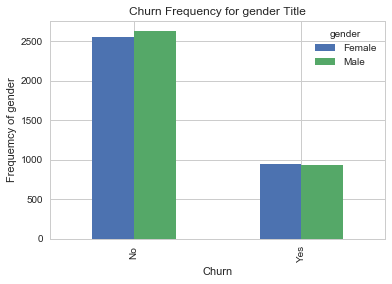

gender  Female  Male   All
Churn                     
No        2549  2625  5174
Yes        939   930  1869
All       3488  3555  7043
SeniorCitizen
SeniorCitizen


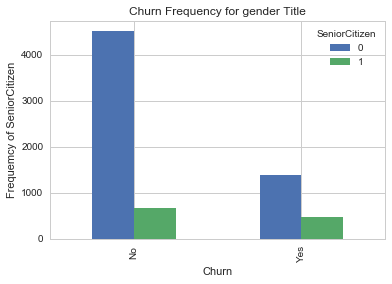

SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043
Partner
Partner


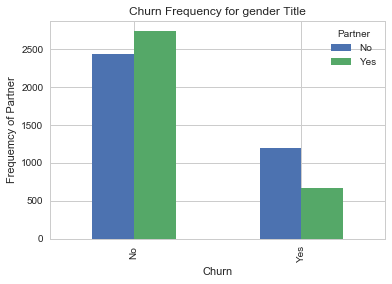

Partner    No   Yes   All
Churn                    
No       2441  2733  5174
Yes      1200   669  1869
All      3641  3402  7043
Dependents
Dependents


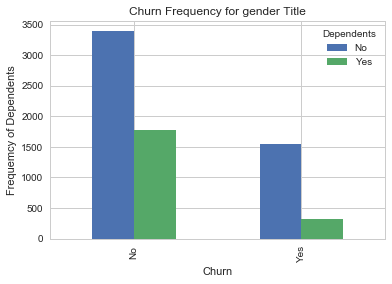

Dependents    No   Yes   All
Churn                       
No          3390  1784  5174
Yes         1543   326  1869
All         4933  2110  7043
tenure
PhoneService
PhoneService


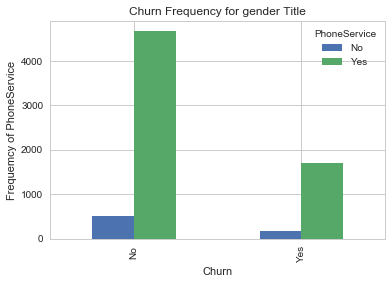

PhoneService   No   Yes   All
Churn                        
No            512  4662  5174
Yes           170  1699  1869
All           682  6361  7043
MultipleLines
MultipleLines


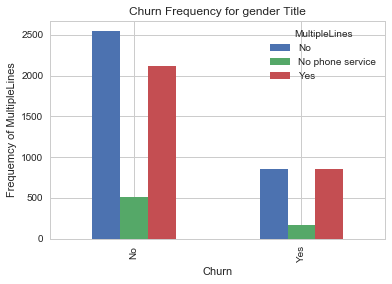

MultipleLines    No  No phone service   Yes   All
Churn                                            
No             2541               512  2121  5174
Yes             849               170   850  1869
All            3390               682  2971  7043
InternetService
InternetService


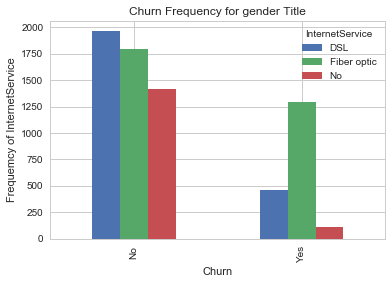

InternetService   DSL  Fiber optic    No   All
Churn                                         
No               1962         1799  1413  5174
Yes               459         1297   113  1869
All              2421         3096  1526  7043
OnlineSecurity
OnlineSecurity


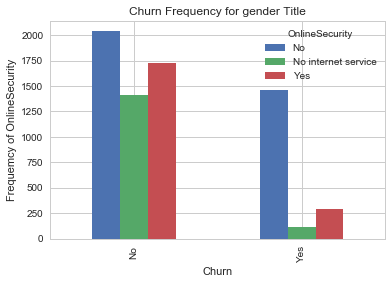

OnlineSecurity    No  No internet service   Yes   All
Churn                                                
No              2037                 1413  1724  5174
Yes             1461                  113   295  1869
All             3498                 1526  2019  7043
OnlineBackup
OnlineBackup


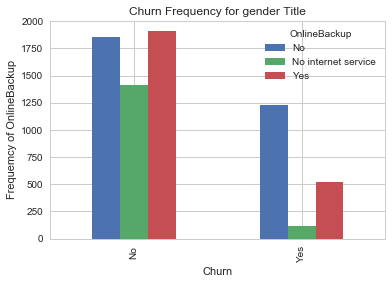

OnlineBackup    No  No internet service   Yes   All
Churn                                              
No            1855                 1413  1906  5174
Yes           1233                  113   523  1869
All           3088                 1526  2429  7043
DeviceProtection
DeviceProtection


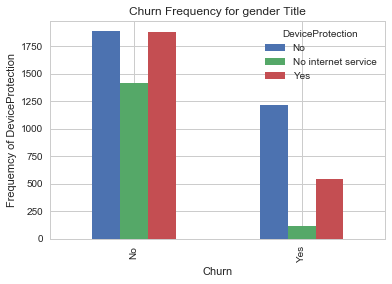

DeviceProtection    No  No internet service   Yes   All
Churn                                                  
No                1884                 1413  1877  5174
Yes               1211                  113   545  1869
All               3095                 1526  2422  7043
TechSupport
TechSupport


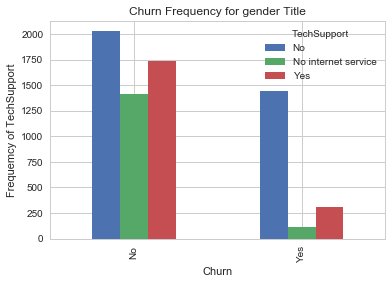

TechSupport    No  No internet service   Yes   All
Churn                                             
No           2027                 1413  1734  5174
Yes          1446                  113   310  1869
All          3473                 1526  2044  7043
StreamingTV
StreamingTV


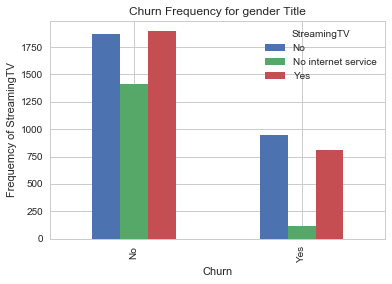

StreamingTV    No  No internet service   Yes   All
Churn                                             
No           1868                 1413  1893  5174
Yes           942                  113   814  1869
All          2810                 1526  2707  7043
StreamingMovies
StreamingMovies


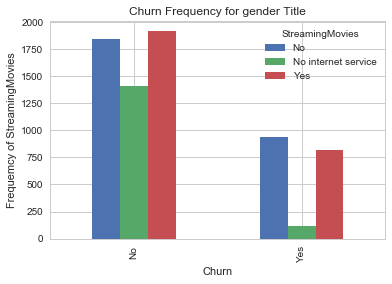

StreamingMovies    No  No internet service   Yes   All
Churn                                                 
No               1847                 1413  1914  5174
Yes               938                  113   818  1869
All              2785                 1526  2732  7043
Contract
Contract


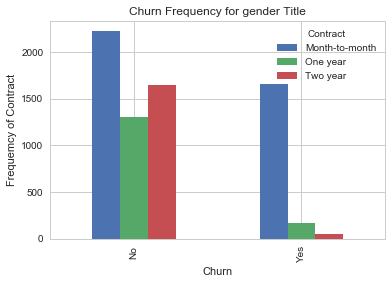

Contract  Month-to-month  One year  Two year   All
Churn                                             
No                  2220      1307      1647  5174
Yes                 1655       166        48  1869
All                 3875      1473      1695  7043
PaperlessBilling
PaperlessBilling


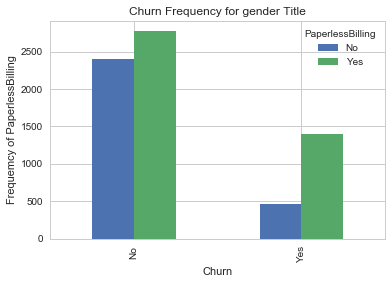

PaperlessBilling    No   Yes   All
Churn                             
No                2403  2771  5174
Yes                469  1400  1869
All               2872  4171  7043
PaymentMethod
PaymentMethod


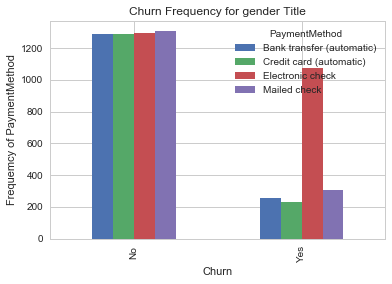

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   
All                                 1544                     1522   

PaymentMethod  Electronic check  Mailed check   All  
Churn                                                
No                         1294          1304  5174  
Yes                        1071           308  1869  
All                        2365          1612  7043  
MonthlyCharges
TotalCharges
TotalCharges


In [ ]:
for i in churn.columns:
    print(i)
    if(churn[i].dtype.name=="object"):
        %matplotlib inline
        print(i)
        pd.crosstab(churn.Churn,churn[i]).plot(kind='bar')
        plt.title('Churn Frequency for gender Title')
        plt.xlabel('Churn')
        plt.ylabel('Frequemcy of {}'.format(i))
        plt.show()
        #plt.savefig('gender_Freq_Graph')
        #my_tab = pd.crosstab(index=churn["Churn"],columns="count")      # Name the count column
        #print(my_tab)
        # Table of survival vs. sex Table o 
        survived_sex = pd.crosstab(index=churn["Churn"], columns=churn[i],margins=True)
        #survived_class.columns = ["class1","class2","class3","rowtotal"]
        #survived_sex.index= ["Yes","No"]
        print(survived_sex)
#survived_sex

In [ ]:
## We can remove the "Gender Column" as it is not explaining the output variables
## 

In [17]:
churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
#churn.describe(include = 'all')

In [86]:
## Check for the kmissing values
NAs=pd.concat([churn.isnull().sum()],axis=1,keys=col)
NAs[NAs.sum(axis=1)>0]

# Filling missing Age values with mean
churn[‘TotalCharges’] = train[‘TotalCharges’].fillna(churn[‘TotalCharges’].mean())

## Filling missing values with the most repeated values 
churn[‘gender’] = churn[‘gender’].fillna(churn[‘gender’].mode()[0])

SyntaxError: invalid character in identifier (<ipython-input-86-095c731ee1c2>, line 6)

In [3]:
churn['gender'].mode()[0]

'Male'

In [5]:
## Feature Engineering
churn.insert(0, "Charges", 0)
total_rows = churn['Churn'].count()
for i in range(0,total_rows):
    churn.loc[i,"Charges"]=churn.loc[i,"tenure"]/churn.loc[i,"MonthlyCharges"]

In [6]:
churn.drop("customerID", axis = 1, inplace=True)
churn.drop("TotalCharges", axis = 1,  inplace=True)
churn.drop("tenure",axis=1,inplace=True)
churn.drop("MonthlyCharges",axis=1,inplace=True)

In [7]:
## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)

In [8]:
my_tab = pd.crosstab(index=churn["gender"],  # Make a crosstab
            columns="count")   # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["Partner"])
#survived_sex.index= ["Yes","No"]
print(survived_sex)

col_0   count
gender       
Female   3488
Male     3555
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669


In [8]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for i in churn.columns:
    if(churn[i].dtype.name=="object"):
        churn[i] = churn[i].astype("category")
        churn[i] = lc.fit_transform(churn[i])
        churn[i] = churn[i].astype("category")
        
# master_dataset.head(7)
#churn.dtypes

In [9]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
churn_cat=[]
churn_ncat=[]
for i in churn.columns:
    if(churn[i].dtype.name=="category"):
        if(len(churn[i].unique()) > 2):
            churn_cat.append(i) 
        else:
            churn_ncat.append(i)
    else:
        churn_ncat.append(i)
                 
churn_cat = churn[churn_cat]
churn_ncat = churn[churn_ncat]

churn_cat = pd.get_dummies(churn_cat,drop_first=True)
fn_dataset = pd.merge(churn_cat,churn_ncat,left_index=True, right_index=True)
X = fn_dataset.iloc[:,:-1]
Y = fn_dataset.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

###### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=5)
print(classifier)
result=classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(result.coef_))], axis = 1)
print(coefficients)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8055660734570238
                     0         0
0      MultipleLines_0 -0.307490
1      MultipleLines_1  0.149583
2      MultipleLines_2 -0.033417
3    InternetService_0 -0.391318
4    InternetService_1  0.286797
5    InternetService_2 -0.086804
6     OnlineSecurity_0  0.166606
7     OnlineSecurity_1 -0.086804
8     OnlineSecurity_2 -0.271127
9       OnlineBackup_0  0.117853
10      OnlineBackup_1 -0.086804
11      OnlineBackup_2 -0.222374
12  DeviceProtection_0 -0.020232
13  DeviceProtection_1 -0.086804
14  DeviceProtection_2 -0.084289
15       TechSupport_0  0.130832
16       TechSupport_1 -0.086804
17       TechSupport_2 -0.235352
18       StreamingTV_0 -0.151845
19       StreamingTV_1 -0.086804
20       StreamingTV_2  0

C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Decision Tree

In [94]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=190, min_samples_leaf=43)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)

print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=43, min_samples_split=190,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Confusion Matrix of Train Dataset
[[3571  305]
 [ 723  683]]
Precision of Train Data 0.6912955465587044
Rrecall of Train Data 0.48577524893314367
Accuracy of Train Data 0.8053767512305945
F1 Score of Train Data 0.570593149540518
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      3876
          1       0.69      0.49      0.57      1406

avg / total       0.79      0.81      0.79      5282

Confusion Matrix of test Dataset
[[1172  126]
 [ 261  202]]
Precision of Test Data 0.6158536585365854
Rrecall of Test Data 0.43628509719222464
Accuracy of Test Data 0.

In [379]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [10]:
from sklearn import tree
#from sklearn import grid_search
import numpy as np
from sklearn.model_selection import GridSearchCV
sample_split_range = tuple(range(2,50,2))
param_grid = dict(min_samples_split=sample_split_range)
#parameters={'min_samples_split':range(10,500,20),'max_depth': range(1,20,2),'min_samples_leaf':range(3,350,10),'max_leaf_nodes':range(2,40,2),'max_features':range(2,10,2)}
parameters={'min_samples_split':np.arange(10,500,20)}
#clf_tree=tree.DecisionTreeClassifier() 
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring='recall')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.scorer_)

0.5369951528914382
{'min_samples_split': 190}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=190,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
make_scorer(recall_score)


In [ ]:
#https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/

In [381]:
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print(roc_auc)
#print(false_positive_rate)
#print(true_positive_rate)

0.6506063490267466
[0. 1.]
[0.        0.4838013 1.       ]


###### max_depth
###### The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in longlong_scalars


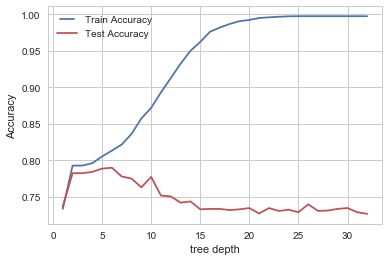

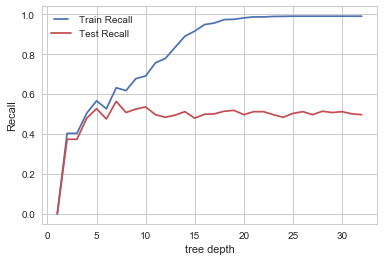

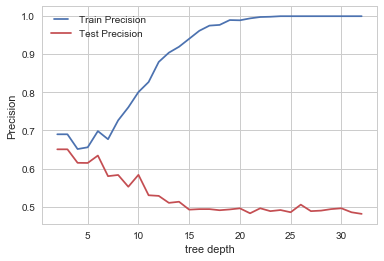

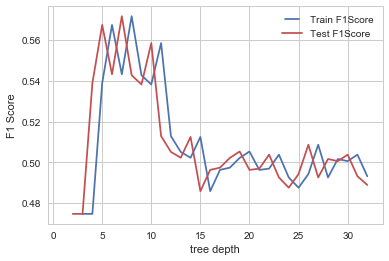

[0.7370812038614424, 0.7825099375354913, 0.7825099375354913, 0.7842135150482681, 0.7887563884156729, 0.7887563884156729, 0.778534923339012, 0.7745599091425327, 0.7649063032367973, 0.7751277683134583, 0.7518455423055083, 0.7518455423055083, 0.7365133446905168, 0.7473026689381034, 0.7319704713231119, 0.7296990346394094, 0.7336740488358887, 0.7359454855195912, 0.730266893810335, 0.7387847813742192, 0.7268597387847814, 0.7342419080068143, 0.7336740488358887, 0.7325383304940375, 0.7325383304940375, 0.7331061896649631, 0.7331061896649631, 0.7291311754684838, 0.7342419080068143, 0.730266893810335, 0.7348097671777399, 0.7342419080068143]


In [392]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
max_depths = np.linspace(1, 32, 32, endpoint=True)
print(max_depths)
train_results_accuracy = []
test_results_accuracy = []
train_results_recall = []
test_results_recall = []
train_results_precision = []
test_results_precision = []
train_results_f1score = []
test_results_f1score = []
for max_depth in max_depths:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   #train_results.append(roc_auc)
   cm_train=confusion_matrix(y_train,train_pred)
   TP=cm_train[1][1]
   FP=cm_train[0][1]
   FN=cm_train[1][0]
   TN=cm_train[0][0]
   precision_train=TP/(TP+FP)
   Recall_train=TP/(TP+FN)
   Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
   F1_Score_train=(2*precision_test*Recall_test)/(precision_test+Recall_test)
   train_results_accuracy.append(Accuracy_train)
   train_results_recall.append(Recall_train)
   train_results_precision.append(precision_train)
   train_results_f1score.append(F1_Score_train)
   y_pred = dt.predict(X_test)
   cm_test=confusion_matrix(y_test,y_pred)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   #test_results.append(roc_auc)

   TP=cm_test[1][1]
   FP=cm_test[0][1]
   FN=cm_test[1][0]
   TN=cm_test[0][0]
   precision_test=TP/(TP+FP)
   Recall_test=TP/(TP+FN)
   Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
   F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
   test_results_accuracy.append(Accuracy_test)
   test_results_recall.append(Recall_test)
   test_results_precision.append(precision_test)
   test_results_f1score.append(F1_Score_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_accuracy, 'b' ,label='Train Accuracy')
line2, = plt.plot(max_depths, test_results_accuracy, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_recall, 'b' ,label='Train Recall')
line2, = plt.plot(max_depths, test_results_recall, 'r', label='Test Recall')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_precision, 'b' ,label='Train Precision')
line2, = plt.plot(max_depths, test_results_precision, 'r', label='Test Precision')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Precision')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_f1score, 'b' ,label='Train F1Score')
line2, = plt.plot(max_depths, test_results_f1score, 'r', label='Test F1Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('tree depth')
plt.show()
print(test_results)

###### We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

###### min_samples_split
###### min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


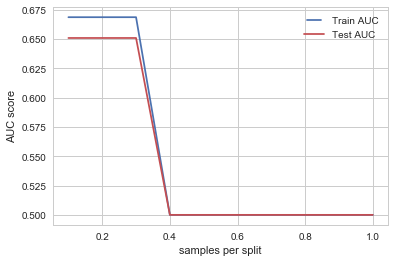

In [26]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per split')
plt.show()


###### At 0.4 as the max_split_sample.... both test anda train are give almost same accuracy. Greater than 0.4 model is not learning any more

###### min_samples_leaf
###### min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

[0.1 0.2 0.3 0.4 0.5]


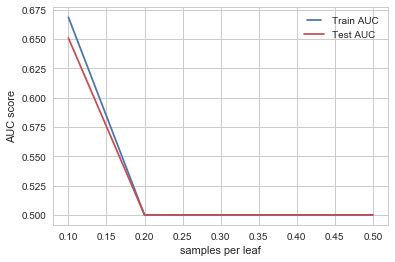

In [27]:
min_samples_leafs  = np.linspace(0.1, 0.5, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per leaf')
plt.show()


###### When min samples per leaf is 10 both and train are performing well. As the sampels per leaf increases model is underfitting

### Building a model with the above assumptions:
###### min_samples_leaf=0.10
###### min_samples_split=0.3
###### max_depth=5

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=0.10,min_samples_split=0.3,max_depth=10)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict_proba(X_train)
y_pred_test = clf.predict_proba(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,y_pred_test)
print(classificaiton_report_test)

In [82]:
from sklearn import tree
#clf = tree.DecisionTreeClassifier(min_samples_leaf=0.10,min_samples_split=0.3,max_depth=10)
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train_p = clf.predict_proba(X_train)
y_pred_test_p = clf.predict_proba(X_test)
print(y_pred_test_p)

X_train['prediction_train']=0

for i in range(len(y_pred_train_p)):
    if(y_pred_train_p[i][0]>0.5):
        X_train.iloc[i,-1]=0
    else:
        X_train.iloc[i,-1]=1

X_test['prediction_test']=0

for i in range(len(y_pred_test_p)):
    if(y_pred_test_p[i][0]>0.5):
        X_test.iloc[i,-1]=0
    else:
        X_test.iloc[i,-1]=1

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,X_train['prediction_train'])
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,X_train['prediction_train'])
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,X_test['prediction_test'])
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,X_test['prediction_test'])
print(classificaiton_report_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\KASTU1\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Confusion Matrix of Train Dataset
[[3864   12]
 [   3 1403]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3876
          1       0.99      1.00      0.99      1406

avg / total       1.00      1.00      1.00      5282

Confusion Matrix of test Dataset
[[1059  239]
 [ 221  242]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.83      0.82      0.82      1298
          1       0.50      0.52      0.51       463

avg / total       0.74      0.74      0.74      1761



In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,X_train['prediction_train'])
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,X_train['prediction_train'])
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,X_test['prediction_test'])
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,X_test['prediction_test'])
print(classificaiton_report_test)

Confusion Matrix of Train Dataset
[[3621  255]
 [ 839  567]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.81      0.93      0.87      3876
          1       0.69      0.40      0.51      1406

avg / total       0.78      0.79      0.77      5282

Confusion Matrix of test Dataset
[[1205   93]
 [ 290  173]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.81      0.93      0.86      1298
          1       0.65      0.37      0.47       463

avg / total       0.77      0.78      0.76      1761



In [356]:
X_train.drop("prediction_train", axis = 1,  inplace=True)

In [358]:
X_train['prediction_train']=0


In [45]:
 print(X_train.iloc[:1,-1:])
X_train['prediction_train']=0
 print(X_train.iloc[0,-1])

      MonthlyCharges
3296            49.3
0


C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
